# Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from collections import Counter

In [ ]:
import os
from google.colab import drive

In [ ]:
gdrive_dir = '/content/drive/'

drive.mount(gdrive_dir, force_remount=True)

Mounted at /content/drive/


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of MultipleLinearRegression.ipynb
/content/drive/MyDrive/Colab Notebooks/D3.csv


In [ ]:
data = '/content/drive/MyDrive/Colab Notebooks/D3.csv'

In [ ]:
enrollment = pd.read_csv(data)
enrollment.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [ ]:
enrollment.columns = ['X1', 'X2', 'X3', 'Y']

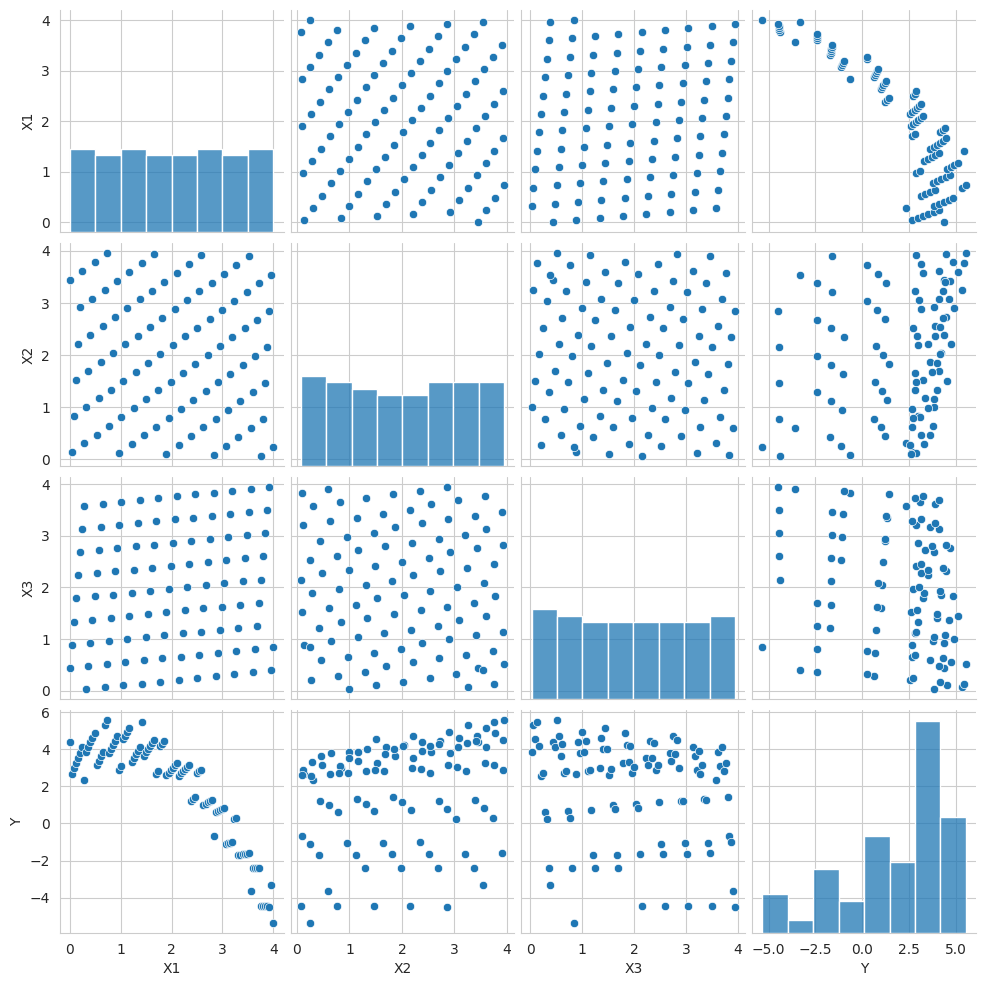

In [ ]:
sb.pairplot(enrollment)

In [ ]:
print(enrollment.corr())

          X1        X2        X3         Y
X1  1.000000 -0.007525  0.116157 -0.861120
X2 -0.007525  1.000000 -0.037818  0.235563
X3  0.116157 -0.037818  1.000000 -0.218163
Y  -0.861120  0.235563 -0.218163  1.000000


In [ ]:
enrollment_data = enrollment[['X1', 'X2', 'X3']].values
enrollment_target = enrollment[['Y']].values
enrollment_data_names = ['X1', 'X2', 'X3']

X, y = scale(enrollment_data), enrollment_target

In [ ]:
# Missing Values
missing_values = X == np.NAN
X[missing_values == True]

array([], dtype=float64)

In [ ]:
LinReg = LinearRegression()

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8062194616705483


In [ ]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  [1.85127565]
slope:  [[-2.33694953  0.62111698 -0.3073479 ]]


In [ ]:
y_pred = LinReg.predict([[1,1,1], [2,0,4], [3,2,1]])
print('prediction: ', y_pred[:5], sep='\n')

prediction: 
[[-0.1719048 ]
 [-4.05201502]
 [-4.22468687]]


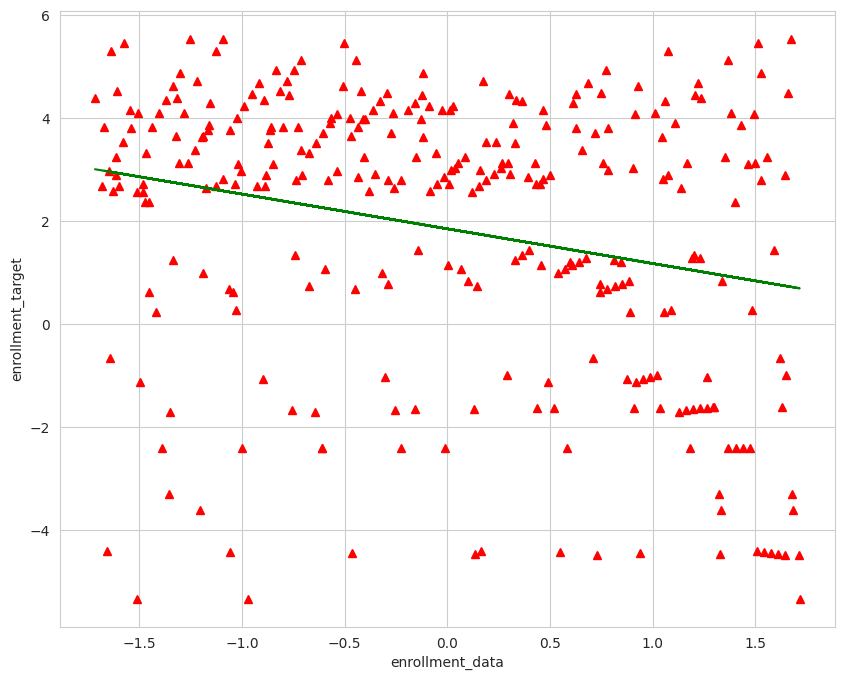

In [ ]:
plt.plot(X, y, 'r^')
s = LinReg.intercept_ + LinReg.coef_.mean()*X
plt.plot(X, s, color='green', label='Linear Regression')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()
